# IMPORTING DATA

Begin with importing data using pandas read_csv function. For this, I parsed date on the "Day" column. I am unable to define the data types for each column as the data needs to be cleaned before the correct data type can be specified.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = pd.read_csv("C:/Users/alexp/DATASCIENCE/GitHub/Captsone_Two_Data/Raw_Data/Raw_Data.csv",parse_dates=['Day'])

## Initial Data Review

Below I reviewed the shape of my data and checked the column names to ensure the ALL the data imported correctly.

In [3]:
data.shape

(107730, 53)

In [4]:
data.columns

Index(['Day', 'Campaign status', 'Campaign', 'Budget name', 'Currency code',
       'Budget', 'Budget type', 'Status', 'Status reasons',
       'Optimization score', 'Bid strategy type', 'Campaign type', 'Impr.',
       'Clicks', 'CTR', 'Avg. CPC', 'Cost', 'Conversions',
       'Conversions (by conv. time)', 'Conv. value (by conv. time)',
       'All conv.', 'All conv. value', 'Store visits', 'Cost / conv.',
       'Conv. rate', 'Conv. value', 'Conv. value / cost', 'Search impr. share',
       'Search lost IS (rank)', 'Search lost IS (budget)', 'Search top IS',
       'Search lost top IS (rank)', 'Search lost top IS (budget)',
       'Search abs. top IS', 'Search lost abs. top IS (rank)',
       'Search lost abs. top IS (budget)', 'Search exact match IS',
       'Click share', 'Invalid clicks', 'Impr. (Abs. Top) %', 'Impr. (Top) %',
       'Value / conv.', 'View-through conv.', 'View-through store visits',
       'Store visit value', '% new sessions', 'Store Sales', 'Store Visits',
   

# Updating Data Types

most columns listed above were imported with the wrong data type due to commas (",") in row values. The next step is removing any unwanted symbols and updating the data types. To do this, i used the "str.replace" method and "astype" method. 

In [5]:
for col in ['Clicks', 'Impr.']:
    data[col]=data[col].str.replace(",","").astype(int)
    
for col in ['Conv. value', 'All conv.','All conv. value']:
    data[col]=data[col].str.replace(",","").astype(float)    

data["Store Revenue"] = data["Store Revenue"].str.replace("£","").str.replace(",","").astype(float)

In [6]:
for col in ["Click share","Search impr. share","Search lost IS (rank)","Search lost IS (budget)"]:
    data[col] = data[col].str.replace(" --","0").str.replace("< 10%","0.09").str.replace(">","").str.replace("%","").str.strip().astype(float)

# Core Dataset

Now that the data types are updated, we can create our core dataset. 

In [7]:
core_df = data[['Day','Campaign','Clicks', 'Impr.','Cost','Conversions','Conv. value','Store Visits','Store Revenue','Click share','Search impr. share','Search lost IS (rank)','Search lost IS (budget)']]

In [8]:
core_df.dtypes

Day                        datetime64[ns]
Campaign                           object
Clicks                              int32
Impr.                               int32
Cost                              float64
Conversions                       float64
Conv. value                       float64
Store Visits                      float64
Store Revenue                     float64
Click share                       float64
Search impr. share                float64
Search lost IS (rank)             float64
Search lost IS (budget)           float64
dtype: object

In [9]:
core_df.describe()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,Click share,Search impr. share,Search lost IS (rank),Search lost IS (budget)
count,107730.000000,1.077300e+05,107730.000000,107730.000000,107730.000000,107730.000000,107730.000000,107730.000000,107730.000000,107730.000000,107730.000000
mean,167.763121,7.550237e+03,70.762098,2.226363,1008.693889,7.529670,832.922419,21.903423,32.882110,28.702829,0.025334
std,624.870090,4.509005e+04,298.634425,11.042734,5370.788128,31.453462,3914.106541,31.609434,36.342145,33.259391,0.840488
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.200000e+01,0.610000,0.000000,0.000000,0.000000,0.000000,0.090000,19.190000,9.555000,0.000000
75%,95.000000,2.005000e+03,29.790000,0.910000,156.975000,2.710000,0.000000,32.910000,63.740000,58.490000,0.000000
max,31074.000000,2.856543e+06,21549.840000,697.460000,353621.870000,874.000000,133685.660000,100.000000,100.000000,90.000000,69.080000


## Removing zero values

After reviewing my new data set, i noticed there were numerous rows with 0 values. This can skew statistics like the mean, std etc... Lets remove all zero values.

In [10]:
nonZeroImpr = (core_df["Impr."] > 0)


In [11]:
non_zero_df = core_df.loc[nonZeroImpr]
non_zero_df.head()


,Day,Campaign,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,Click share,Search impr. share,Search lost IS (rank),Search lost IS (budget)
2,2019-01-10,{Google - Generic - Mattresses Competitors - N...,13,1943,6.29,0.00,0.00,1.0,0.00,0.09,27.08,72.92,0.0
4,2021-03-19,{Google - Generic - Beds Brands - NVK - BMM},0,2,0.00,0.00,0.00,0.0,0.00,0.00,40.00,60.00,0.0
7,2019-02-10,{Google - Generic - Beds Sizes - NVK - BMM},305,52340,112.88,1.32,1015.09,7.0,1708.31,16.20,31.48,68.52,0.0
8,2019-03-14,{Google - Generic - Headboards - NVK - BMM},60,6405,18.26,0.00,0.00,0.0,756.54,21.64,42.26,57.74,0.0
9,2019-06-23,{Google - Generic - Headboards - NVK - BMM},59,8573,21.33,1.00,179.00,0.0,915.96,28.90,46.82,53.18,0.0


In [12]:
non_zero_df.shape

(66134, 13)

In [13]:
non_zero_df.describe()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,Click share,Search impr. share,Search lost IS (rank),Search lost IS (budget)
count,66134.000000,6.613400e+04,66134.000000,66134.000000,66134.000000,66134.000000,66134.000000,66134.000000,66134.000000,66134.000000,66134.000000
mean,273.280310,1.229907e+04,115.269006,3.626668,1643.127478,12.265572,1356.801829,35.679918,53.562202,45.137838,0.041268
std,779.241706,5.703931e+04,374.360449,13.912652,6778.340949,39.414318,4923.967866,33.705326,32.308453,30.998612,1.072420
min,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.100000e+01,1.480000,0.000000,0.000000,0.000000,0.000000,0.090000,25.382500,15.792500,0.000000
50%,54.000000,1.027000e+03,15.520000,0.000000,0.000000,1.000000,0.000000,24.490000,53.030000,46.390000,0.000000
75%,227.000000,5.820000e+03,92.237500,2.000000,781.077500,8.000000,828.467500,61.660000,83.330000,74.050000,0.000000
max,31074.000000,2.856543e+06,21549.840000,697.460000,353621.870000,874.000000,133685.660000,100.000000,100.000000,90.000000,69.080000


# Sale Distribution

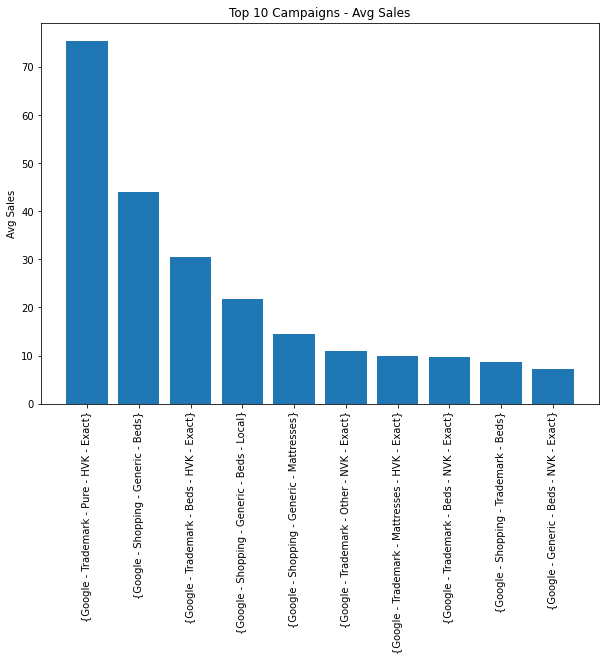

In [36]:
Avg_Sales = non_zero_df.groupby("Campaign")[["Conversions","Conv. value"]].mean().reset_index().sort_values("Conversions", ascending=False)
campaigns = Avg_Sales["Campaign"]
conv = Avg_Sales["Conversions"]
sales = Avg_Sales["Conv. value"]
# Figure Size
fig = plt.figure(figsize =(10, 7))
plt.bar(campaigns[0:10], conv[0:10])
width = 0.4
plt.title("Top 10 Campaigns - Avg Sales")      
plt.ylabel("Avg Sales")
plt.xticks(rotation=90) 
plt.xticks(rotation=90) 
# Show Plot
plt.show()


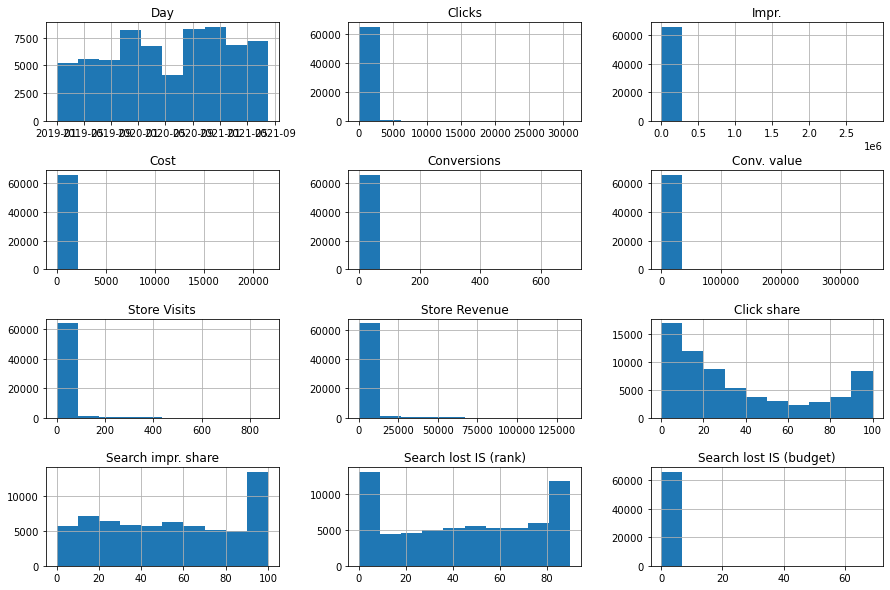

In [37]:
non_zero_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

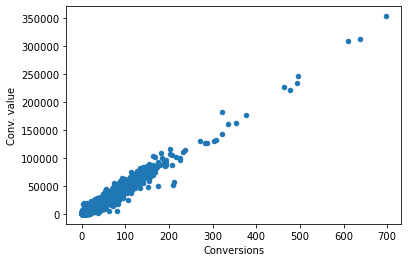

In [38]:
non_zero_df.plot(x="Conversions", y="Conv. value", kind='scatter');

# Summary

To conclude, we have:
1.) Removed unwanted values from rows
2.) Updated data types
3.) Created new dataframe with the core columns needed for my project
4.) Removed zero value rows

Data is clean and streamlined. Next step is Exploratory Data Analysis (EDA)